<a href="https://colab.research.google.com/github/magambomaurice93/use-of-pandas-in-machine-learning-/blob/main/lecture_5_Exploratory_Data_Analysis_Multivariate_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis

Univariate visualizations are great for understanding one column, but, by definition, they cannot tell us about the relationships between columns. Therefore, we need additional types of visualizations that explore the relationships between 2 or more columns.

In Data Science, we identify one of the columns as the values we want to explain or predict. We call these types of columns the "target." The remaining columns are considered our "features."

As with univariate visualizations, the type of visualization we select will be based on the data types we want to visualize.

However, now we have two columns to consider:

* the target's data type (numeric vs. categorical)
* the feature's data type (numeric vs. categorical)  

A few examples of multivariate plots you will learn to make are:

**Boxplots**

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1682105968__1681850473.png">  

**A Heatmap of Correlation Values**  

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1682106077__1681852763.png">  

**Regression Plots**

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1682106147__1682015966Capture.png" width="50%">

**Boxen Plot**  

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1682106214__1682029282Capture.png"  width="50%">


### Bar Plots

We shall use data from [here](https://drive.google.com/file/d/1UnL59IupYrZd6f3oxkZxttYiNTxDVNMR/view?usp=drive_link) for this section.

In [4]:
# # Load google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
# Load data
filename = "/content/drive/MyDrive/REFACTORY/jeremy/ames-housing-cleaned-eda.csv"
df = pd.read_csv(filename)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [9]:
# Check the Bldg Type column
df['Bldg Type'].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

According to the [data dictionary](https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit?usp=sharing) for the meaning of the category names.

- For "Bldg Type"
  * 1Fam: Single-family Detached
  * 2FmCon: Two-family Conversion; originally built as a one-family dwelling
  * Duplx: Duplex
  * TwnhsE: Townhouse End Unit
  * TwnhsI: Townhouse Inside Unit

In [10]:
# Use groupby to calculate the average for each category
bldg_type_prices = df.groupby('Bldg Type')['SalePrice'].mean()
bldg_type_prices

Bldg Type
1Fam      185589.360825
2fmCon    125581.709677
Duplex    139808.935780
Twnhs     135934.059406
TwnhsE    192311.914163
Name: SalePrice, dtype: float64

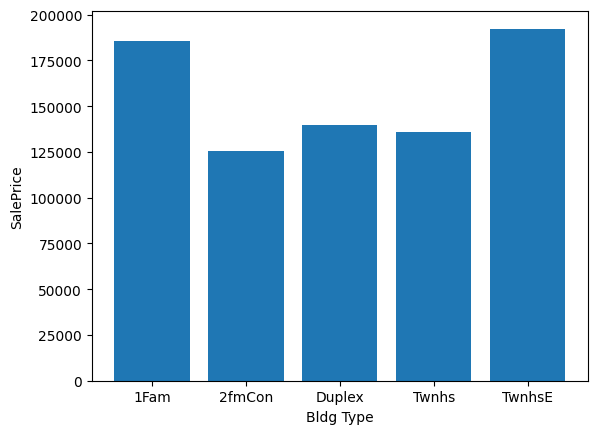

In [11]:
# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(bldg_type_prices.index, bldg_type_prices.values);
ax.set_ylabel('SalePrice')
ax.set_xlabel("Bldg Type");

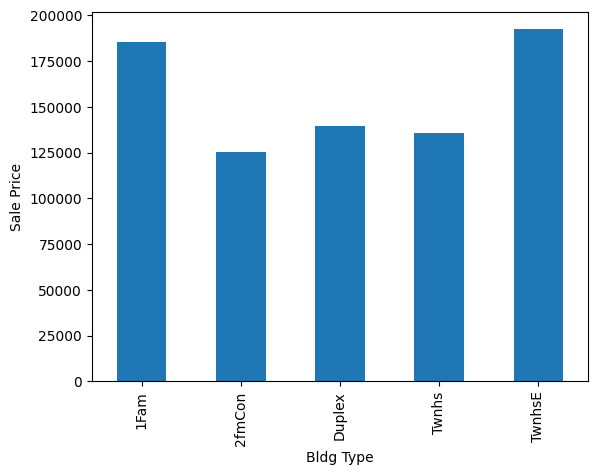

In [12]:
# Using pandas to plot the means
ax = bldg_type_prices.plot(kind='bar')
ax.set_ylabel("Sale Price");

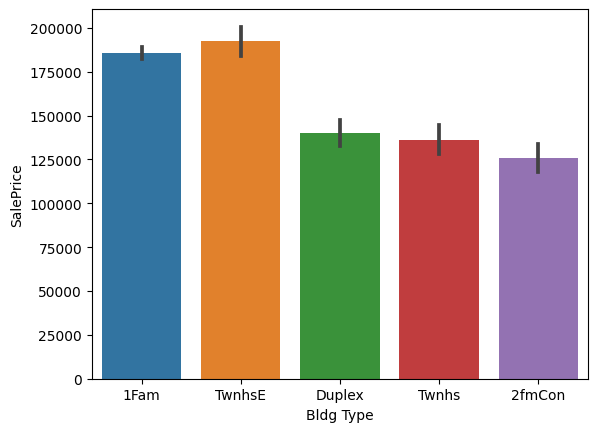

In [13]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Bldg Type', y="SalePrice")

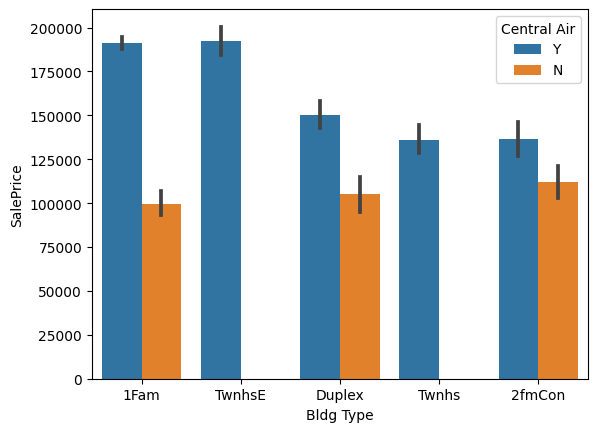

In [14]:
# Grouped bar charts
# Using seaborn to plot the group means by Buildign Type colored by Central Air
ax = sns.barplot(data=df, x="Bldg Type", y="SalePrice", hue='Central Air')

In [15]:
df[["Bldg Type", "Central Air"]]

,Bldg Type,Central Air
0,1Fam,Y
1,1Fam,Y
2,1Fam,Y
3,1Fam,Y
4,TwnhsE,Y
...,...,...
2925,1Fam,Y
2926,1Fam,Y
2927,Twnhs,Y
2928,1Fam,Y


Notice that our BldgTypes are still on the x-axis, but each building type no longer has a different color.

Instead, Blue was used to represent homes with Central Air ("Y"), and Orange was used to represent homes without Central Air ("N").

Note that this graph would be VERY hard to reproduce with matplotlib. It is possible, but it would take many more lines of code, and the final result would not be as aesthetically pleasing.

Before we added Central Air as the hue, we saw that "1Fam" and "TwnhsE" had the highest average Sale Prices.

Now that we have added Central Air, we can see that this was a little misleading.

TwnheE and Single Family with Central Air have the highest Sale Price. If we look at the 1Fam homes without Central Air, we can see that these homes have the lowest Sale Price.

Note that you may want to test out swapping which column to use as x and which to use as hue, depending on which column we want to compare across groups.

Let's swap our x and hue so that our binary category of Bldg Type is the hue.

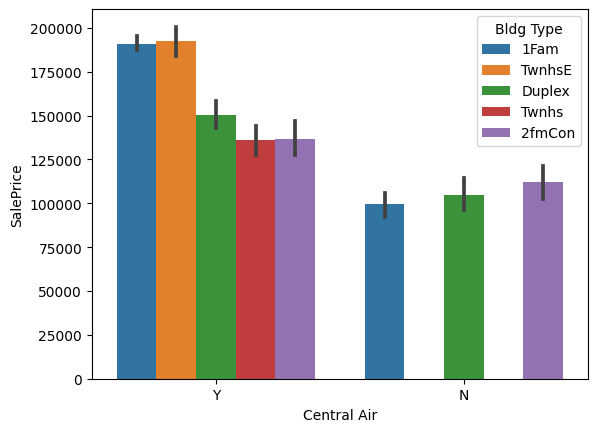

In [16]:
# Using seaborn to plot the group means by central air colored by Bldg Type
ax = sns.barplot(data=df, x="Central Air", y="SalePrice", hue='Bldg Type')

# Correlation and Heat Maps
**What is correlation?**  

As data scientists, we are often interested in if (and how) different features of a dataset may be related.  For numerical data, one key way to describe a relationship is the correlation between the values.  
There are different types of correlation:


Positive Correlation  
If two variables change in the same direction, they have a positive correlation.  For example, there is a positive correlation between hours worked and paycheck (if you are paid by the hour!).  As hours goes up, paycheck goes up.  As hours go down, paycheck goes down.



Negative Correlation  
If two variable change in the opposite direction, they have a negative correlation.  For example, there is a negative correlation between altitude and temperature.  As altitude goes up, temperature goes down.  As altitude goes down, temperature goes up.  

No Correlation  
There is no relationship between a person's height and the cost of bread! So these variables are not correlated.  

We can also calculate the level of correlation between variables. Some of the popular methods used to calculate the degree of correlation in statistics are [Kendall's Correlation Coefficient](https://https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), [Spearman's Correlation Coefficient](https://https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) and [Pearson's Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).    
  
   
The correlation coefficient (**r**) ranges from -1 to +1.
Specifically, for **negative correlation** value lies between 0 up to -1 with higher magnitude meaning a higher correlation ie. -5 is a higher correlation than -3.
  
**Positive correlation** value ranges from 0 to +1 with higher values implying a stronger correlation.

**Correlation is NOT causation!**  
It can be tempting to misinterpret a correlation as one variable causing the values of another to change. We cannot conclude anything about the cause of a change based on correlation. All we can conclude is that there is a relationship between the variables.

## Getting correlation between variables with Pandas.
In pandas we can get the correlation between different variables/columns using the dataframe .corr() method. By default, the .corr() method computes the correlaton using the Pearson's method, but supports the above mentioned methods or even a custom function. ([see documentation of .corr() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)).





We are first going to demo this with a smaller dataset that has information about Olympic medalists. This is a [direct URL](https://docs.google.com/spreadsheets/d/e/2PACX-1vTtqWeFFAV3GA13M4eXdzMkAKAxIQ7fek4kv16wntAI_2QfYzm_BxdW6HVblVHy0VFRwsA47xFn8--6/pub?output=csv) for this dataset.

In [17]:
# Let us load our data
filename = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTtqWeFFAV3GA13M4eXdzMkAKAxIQ7fek4kv16wntAI_2QfYzm_BxdW6HVblVHy0VFRwsA47xFn8--6/pub?output=csv"
df = pd.read_csv(filename)

In [18]:
# Exploring the data
df.head(3)

,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# How many columns do we have?



In [21]:
# What are the datatypes of each column?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40616 entries, 0 to 40615
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      40616 non-null  int64  
 1   Age     39143 non-null  float64
 2   Height  31615 non-null  float64
 3   Team    40616 non-null  object 
 4   NOC     40616 non-null  object 
 5   Games   40616 non-null  object 
 6   Year    40616 non-null  int64  
 7   Season  40616 non-null  object 
 8   City    40616 non-null  object 
 9   Sport   40616 non-null  object 
 10  Event   40616 non-null  object 
 11  Medal   5917 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [ ]:
# How many times does each team appear in the column Team?

In [ ]:
# Do we have any null values?

Getting the correlation between columns

In [ ]:
df.head(3)

In [ ]:
# We use the dataframe .corr() method.
df.corr()

In [24]:
# To suppress the warning, consider only numeric columns pb passing True for the numeric_only parameter
df.corr(numeric_only = True)

,ID,Age,Height,Year
ID,1.000000,0.001835,-0.006005,0.014380
Age,0.001835,1.000000,0.150039,-0.126934
Height,-0.006005,0.150039,1.000000,0.052524
Year,0.014380,-0.126934,0.052524,1.000000


In [25]:
# We can check the type
type(df.corr())

<ipython-input-25-c7888db99e77>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  type(df.corr())


pandas.core.frame.DataFrame

In [26]:
# Save it in a variable
correlation_df = df.corr(numeric_only = True)

In [27]:
correlation_df.head()

,ID,Age,Height,Year
ID,1.000000,0.001835,-0.006005,0.014380
Age,0.001835,1.000000,0.150039,-0.126934
Height,-0.006005,0.150039,1.000000,0.052524
Year,0.014380,-0.126934,0.052524,1.000000


The .corr() method compres each column against the others and computes the correlation coefficient.  
How can we complement this information?  
Answer: **Visualization**

We can use the visualize the correlation_df using the heatmap plot in Seaborn. The heatmap shows a visual representation of the correlation values and the magnitude of correlation.  
To do this, we simply pass the correlation_df to the method and can add some additional parameters to beutify our plot

<Axes: >

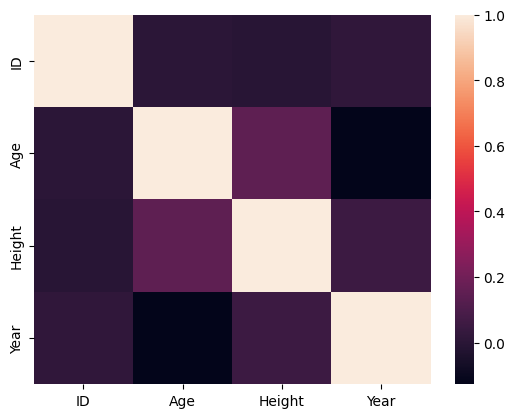

In [28]:
# using seaborn heatmap to visualize the correlation dataframe
sns.heatmap(correlation_df)

<Axes: >

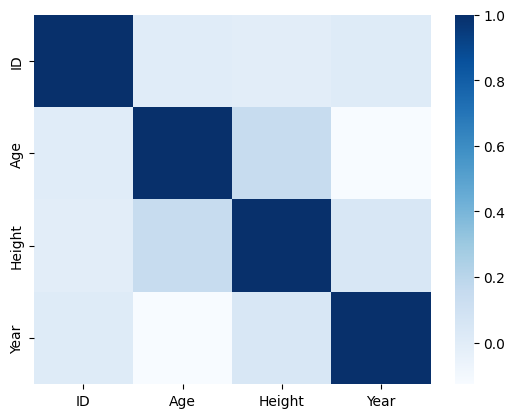

In [29]:
# Looks beautiful but its a bit difficult to interprete.
# let's add a few parameters like cmap. cmap defines the
# color we want to use for our heatmap e.g Blues, Greens,..
sns.heatmap(correlation_df, cmap = 'Blues')

This definetly looks better with one color. The darker shades of blue imply a higher correlation coeficient and the vice-versa is true.  
But we can do even one better.

<Axes: >

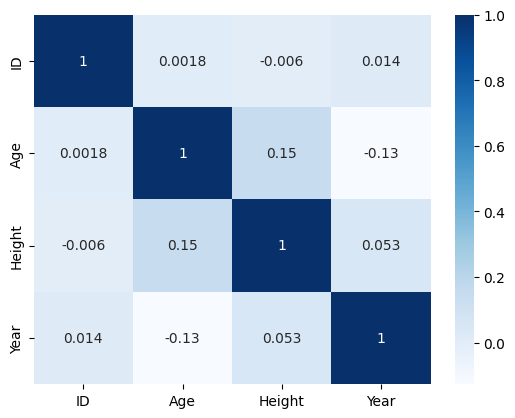

In [30]:
# By passing the parameter True for the annot argument
sns.heatmap(correlation_df, cmap = 'Blues', annot=True)

**NOTE**: The correlation coefficient between the same variable is always 1


In general a correlation coefficient greater than 0.7 is considered "strong."

Between 0.5 and 0.7 is considered "moderate".  

Between 0.3 and 0.5 is considered  a "low" correlation.


However, these rules of thumb can vary between content areas!

### Using the Ames Dataset

You can get the data from [here](https://drive.google.com/file/d/1UnL59IupYrZd6f3oxkZxttYiNTxDVNMR/view?usp=drive_link)

In [31]:
# Load data
filename = "/content/drive/MyDrive/AI_ML_Data_Analytics/slides/Week 3/ames-housing-cleaned-eda.csv"
df = pd.read_csv(filename)
df.head()

FileNotFoundError: ignored

In [ ]:
# Get correlations
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

In [ ]:
# Make heatmap to visualize correlations
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

In [ ]:
# modify the plot with matplotlib e.g. increaze the size using the figsize parameter
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'Greens', annot = True, ax=ax);

### Regression Plots  

**Plotting numeric features vs numeric target**  

As we visualize the relationships between our features and the target, we need a type of chart that will allow us to plot numeric X columns vs. a numeric y. You've already seen a very simple plot for plotting 2 numeric features: the scatter plot.

In [ ]:
# We can make a scatter plot with pandas' .plot. and pass scatter argrument for the kind parameter.
ax = df.plot(kind='scatter', x='Living Area Sqft', y='SalePrice');

In [ ]:
# Scatter Plot with Matplotlib
fig, ax = plt.subplots()
ax.scatter(df['Living Area Sqft'], df['SalePrice']);
ax.set(xlabel='Living Area Sqft', ylabel="SalePrice");

In [ ]:
# scatter plot with Seaborn
sns.scatterplot(data=df, x='Living Area Sqft', y='SalePrice')

In [ ]:
# Creating a scatterplot using Central Air as the hue argument
ax = sns.scatterplot(data=df, x="Living Area Sqft" , y="SalePrice",
                     hue="Central Air");

Visualizing the Trend between X and y
We can see the Living Area Sqft on the X-axis and the Sale Price on the Y-axis. It looks like as we increase the value of X (move right along the x-axis), the value for Y seems to increase. There are several markers that don't follow this trend perfectly.

We want to visually summarize the overall relationship between the x and y. The easiest way to do so is to use Seaborn's sns.regplot function.

The regplot is very helpful, as it will:

1. Create a scatter plot with Matplotlib
2. Calculate a line of best fit using another package (either statsmodels or SciPy, depending),.
3. Finally, it will plot the trend line using Matplotlib.

In [ ]:
# sns.regplot requires the same arguments as scatterplot
ax = sns.regplot(data=df, x="Living Area Sqft", y="SalePrice");

In [ ]:
# Customization
# there is a number of things that can be customized on the seaborn regplot like the line, markers,...

# Saving the arguments for the line color in a dict to to use as line_kws
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="Living Area Sqft", y="SalePrice",
                 line_kws=line_kws)

In [ ]:
# Saving the arguments for the markers' edge color in a dict to to use as scatter_kws
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x="Living Area Sqft", y="SalePrice",
                 line_kws=line_kws, scatter_kws=scatter_kws);

The hue argument works so easily with sns.scatterplot, we would expect the regplot to also accept a hue argument, but it does not!

Instead, there is a more advanced plot that will allow us to display trendlines for groups.

The More Advanced Regression Plot: the Linear Model Plot

There is a second class of Seaborn plots that are more complex than the normal Matplotlib plots that we have used so far. So far, we have only used Seaborn plots that return a simple Matplotlib Axes. The more advanced type of Seaborn plots returns a special Seaborn object called a FacetGrid, instead of a Matpotlib Axes.

We shall use the [sns.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [ ]:
# Use sns.lmplot and save as g
g = sns.lmplot(data=df, x="Living Area Sqft", y="SalePrice",
                hue="Central Air");

In [ ]:
# Adding back the scatter_kws
g= sns.lmplot(data=df, x="Living Area Sqft", y="SalePrice",
               scatter_kws=scatter_kws,
                hue="Central Air");

In [ ]:
# Take note that the returned object is a seaborn FacetGrid object and not the matplotlib Axes object
type(g)

In [ ]:
# The matplotlib Axes object is wrapped under the returned seaborn object and can be accessed with the dot notation to enable the use of matplotlib methods

# Set the title using g.ax.set_title()
g = sns.lmplot(data=df, x="Living Area Sqft", y="SalePrice",
               scatter_kws=scatter_kws,
                hue="Central Air");
g.ax.set_title("LM Plot");

## Multivariate Categorical Plots
**When to Use?**
Multivariate categorical plots should be used when you are comparing:
- Categorical Features (X) vs. a Numeric Target (y)
- Categorical Features (X) vs. a Categorical Target (y)

In [ ]:
# Checking how many categories in each categorical column
df.select_dtypes('object').nunique()

**Categorical Plots**

In [ ]:
# Remember the Univariate countplot
ax = sns.countplot(data=df, x='Bldg Type')

In [ ]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='Bldg Type', hue='Central Air')

**Bar plots**

In [ ]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='Bldg Type', y='Living Area Sqft')

In [ ]:
# We can use the striplot which is a categorical scatter plot to view more information about each category.
# Stripplot takes the same arguments as barplot
ax = sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft',
                   hue='Bldg Type')

In [ ]:
# Customizing the stipplot
ax = sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft',
                   hue='Bldg Type', edgecolor='white', linewidth=1)


Seaborn hasd a powerful catplot method which enabels us to specify different types plots using the kind argument. The options for kind are:

- "strip" (default)
- "swarm"
- "bar"
- "count"
- "box"
- "boxen"
- "violin"

In [ ]:
# Using catplot to make a swarmplot, include size argument s=1
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft',hue='Bldg Type',
                kind='swarm', s=1)

In [ ]:
# Using catplot to make a boxplot, adding dodge=False to reduce white space
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft',hue='Bldg Type',
                kind='box', dodge=False)

In [ ]:
# Using catplot to make a violin plot
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft',hue='Bldg Type',
                kind='violin', dodge=False)

In [ ]:
# Using catplot to make a violin plot
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft',hue='Bldg Type',
                kind='boxen', dodge = False)

## Subplots
Many times we may want to compare our data side-by-side using visualizations. We can do this with subplots. Let us use this [dataset](https://drive.google.com/file/d/1Z6RnlnzKyiT-byN6x6XcUYt62s_13Lgg/view?usp=sharing) to illustrate this.

In [ ]:
# Load and view the top rows in our dataframe
filename = "/content/drive/MyDrive/AI_ML_Data_Analytics/slides/Week 3/linearRegPredicted.csv"
df = pd.read_csv(filename)
df.head()

We are going to compare 2 scatter and line plots side by side.

In [ ]:
# Create filter for our data with intercept
interceptFilter = df['intercept'] == True

# Filter the data
df_intercept = df.loc[interceptFilter, :]
df_nointercept = df.loc[~interceptFilter, :] # Note te use of the ~ operator.

We shall use the subplot() method which takes 3 parameters i.e  
 **matplotlib.subplot(rows, columns, position)**

In [ ]:
# Matlab-style


# Play with this code and see what happens!
# Adjust size of figure
plt.figure(figsize=(8,4))
# Subplot 1
plt.subplot(1, 2, 1);
plt.plot(df_intercept['feature'].values, df_intercept['predicted'].values, c = 'r');
plt.scatter(df_intercept['feature'].values, df_intercept['actual'].values, c= 'k');
plt.title('intercept', fontsize = 12);
# Subplot 2
plt.subplot(1, 2, 2);
plt.plot(df_nointercept['feature'].values, df_nointercept['predicted'].values, c = 'r');
plt.scatter(df_nointercept['feature'].values, df_nointercept['actual'].values, c= 'k');
plt.title('no intercept', fontsize = 12);

In [ ]:
# Add a legend to your plots

In [ ]:
# Object-oriented

# Play with this code and see what happens!
# Adjust size of figure and create subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8,4));
# Subplot 1
axes[0].plot(df_intercept['feature'].values, df_intercept['predicted'].values, c = 'r');
axes[0].scatter(df_intercept['feature'].values, df_intercept['actual'].values, c= 'k');
axes[0].set_title('intercept', fontsize = 12);
# Subplot 2
axes[1].plot(df_nointercept['feature'].values, df_nointercept['predicted'].values, c = 'r');
axes[1].scatter(df_nointercept['feature'].values, df_nointercept['actual'].values, c= 'k');
axes[1].set_title('no intercept', fontsize = 12);

#### Your task
Recreate the plots above using the seaborn regplot/lmplot

### Saving plots
Sometimes you may wan to save your plots as files(pictures) that you may want to use externally or for reference e.g. in a report.
Pick data from [here](https://drive.google.com/file/d/1MFl7V1Hs0-jxbq5d5WwaW-d8cSDMYWia/view?usp=sharing).

In [ ]:
# Load the data and view top
filename = "/content/drive/MyDrive/AI_ML_Data_Analytics/slides/Week 3/linearRegPredicted.csv"
df = pd.read_csv(filename)
df.head(3)

In [ ]:
# Let's extract the series and store them in variables.
feature = df['feature'].values
actual = df['actual'].values
predicted = df['predicted'].values

We can save the plots using the savefig() method of matplotlib as shown below.

In [ ]:
# MATLAB-style
plt.plot(feature, predicted, c = 'r', label = 'Prediction')
plt.scatter(feature, actual, c= 'k', label = 'Actual')
plt.legend(loc=(1.02,0))
plt.savefig('legendcutoff.png', dpi = 300)

In the saved image we can see that the legend has been cut off. We can use the tight_layout() method to sove this.

In [ ]:
plt.plot(feature, predicted, c = 'r', label = 'Prediction')
plt.scatter(feature, actual, c= 'k', label = 'Actual')
plt.legend(loc=(1.02,0))
plt.tight_layout() # This solves our problem
plt.savefig('legendnotcutoff.png', dpi = 300)

In [ ]:
# Save image properly
fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(feature, predicted, c = 'r', label = 'Prediction')
axes.scatter(feature, actual, c= 'k', label = 'Actual')
axes.legend(loc=(1.02,0))
fig.tight_layout()
plt.savefig('obj_legendnotcutoff.png', dpi = 300)

In [ ]:
# Object-oriented
fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(feature, predicted, c = 'r', label = 'Prediction')
axes.scatter(feature, actual, c= 'k', label = 'Actual')
axes.legend(loc=(1.02,0))
plt.savefig('obj_legendcutoff.png', dpi = 300)

# Reading: Multiple Subblots